In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('Customers.csv')
product_df = pd.read_csv('Products.csv')
transaction_df = pd.read_csv('Transactions.csv')

We will do EDA on the customers data first


In [3]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
print(customer_df.info())
print(customer_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
(200, 4)


So from this we can see that the data for customers has no null values


In [5]:
customer_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
customer_df.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

This will allow us to see if there is imbalance between regions


In [7]:
customer_df['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

There are no duplicated rows either

In [8]:
customer_df.duplicated().sum()

0

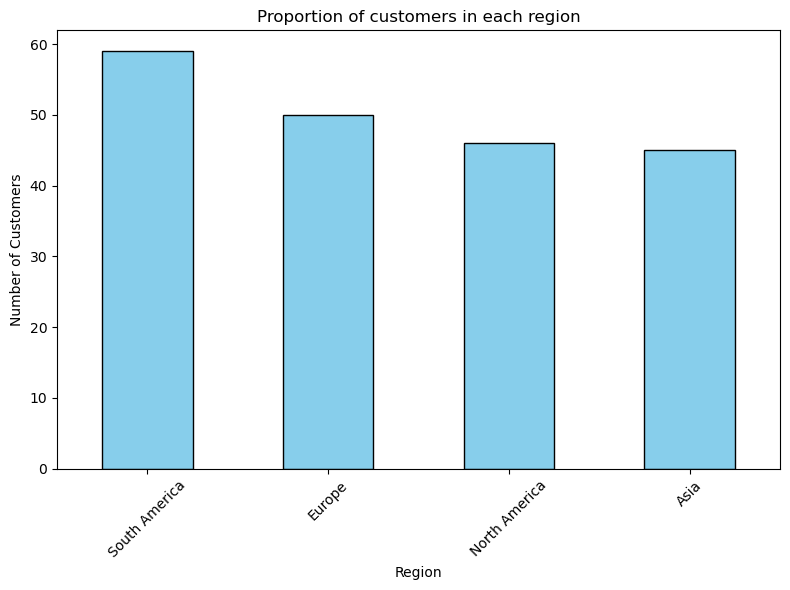

In [ ]:
plt.figure(figsize=(8, 6))
customer_df['Region'].value_counts().plot(kind='bar', color='skyblue', edgecolor = 'black')
plt.title('Proportion of customers in each region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'])

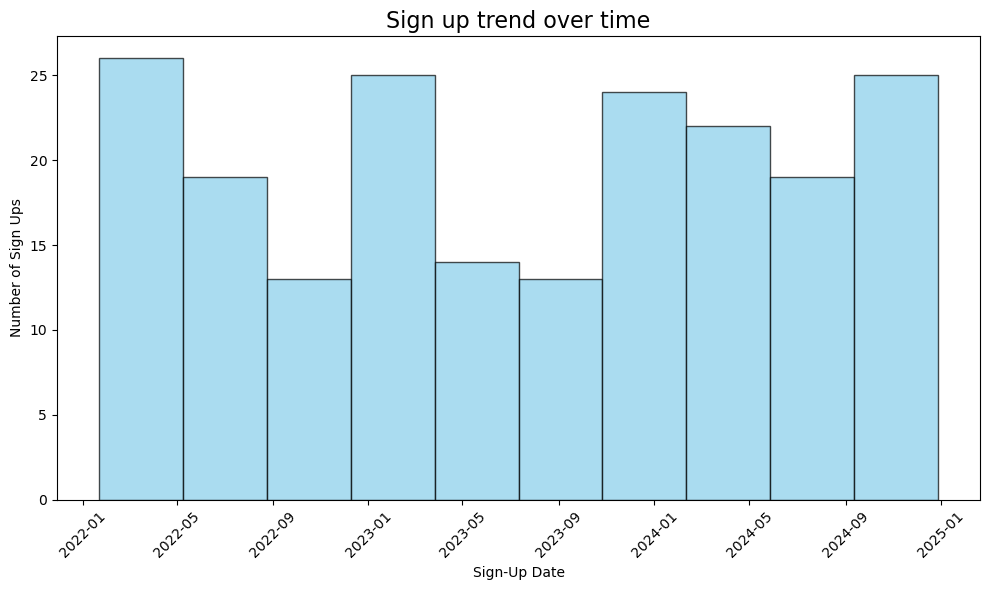

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(customer_df['SignupDate'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sign up trend over time', fontsize=16)
plt.xlabel('Sign-Up Date')
plt.ylabel('Number of Sign Ups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

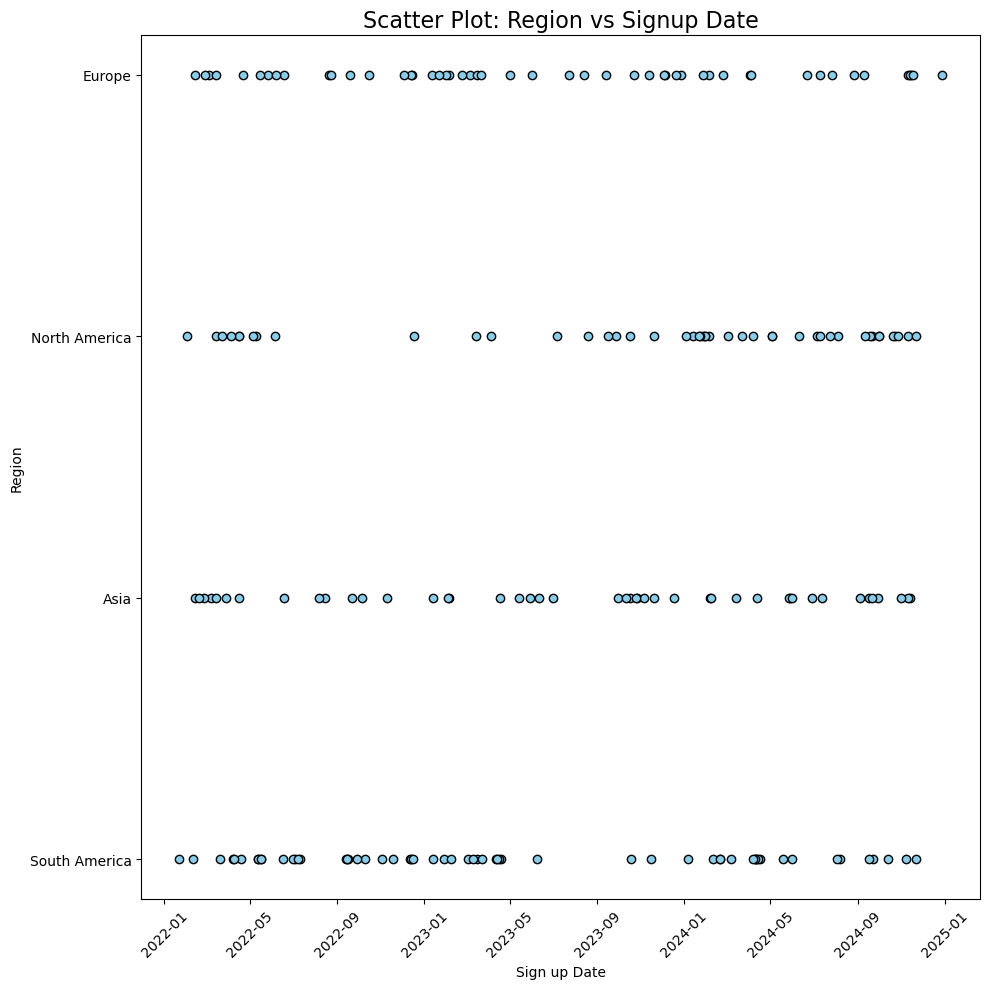

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(customer_df['SignupDate'], customer_df['Region'], color='skyblue', edgecolor='black')
plt.title('Scatter Plot: Region vs Signup Date', fontsize=16)
plt.xlabel('Sign up Date')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now let's do EDA on Products Data

In [13]:
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [14]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [15]:
product_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


The types of products seem fairly balanced

In [16]:
print(product_df['Category'].value_counts())

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


From this we can see that there are no null values in this dataset either

In [17]:
product_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

There are no duplicated values either

In [18]:
product_df.duplicated().sum()

0

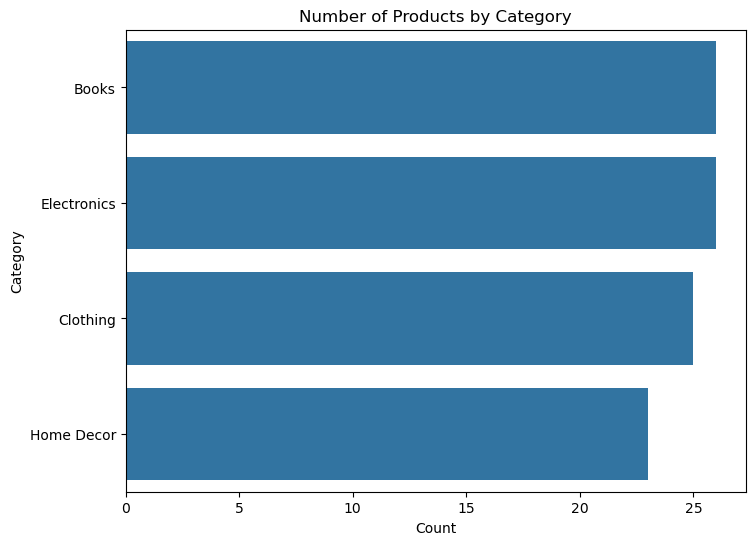

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=product_df, y='Category', order = product_df['Category'].value_counts().index)
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

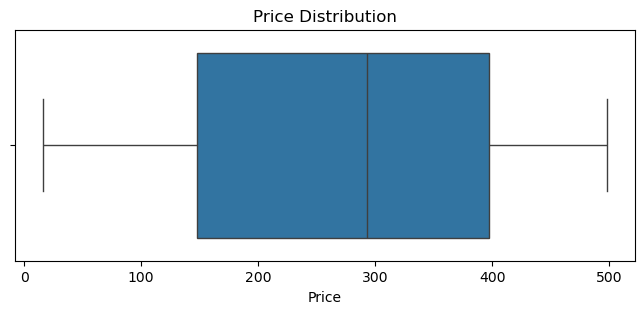

In [20]:
#A box plot for outliers in the Price column
plt.figure(figsize=(8, 3))
sns.boxplot(data = product_df, x = 'Price')
plt.title('Price Distribution')
plt.show()

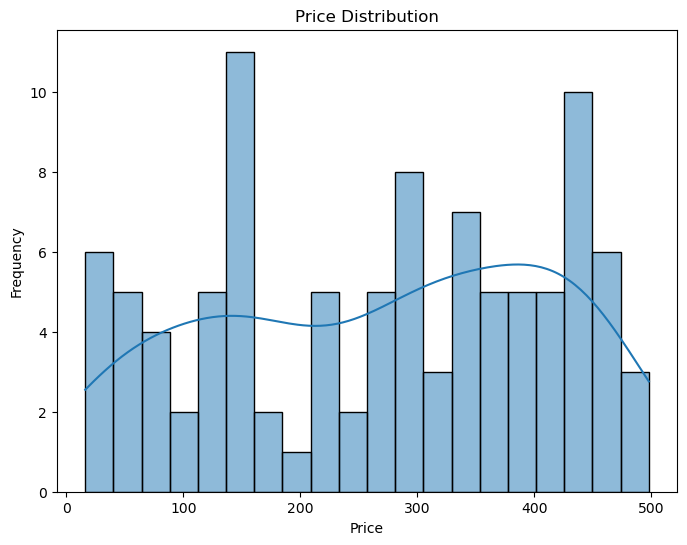

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(product_df['Price'], kde=True, bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Let's remove outliers through the IQR (Inter Quartile Range) Method

In [22]:
q1 = product_df['Price'].quantile(0.25)
q3 = product_df['Price'].quantile(0.75)
IQR = q3 - q1
non_outliers = (product_df['Price'] >= (q1 - 1.5 * IQR)) & (product_df['Price'] <= (q3 + 1.5 * IQR))
product_df = product_df[non_outliers]

In [23]:
product_df.shape

(100, 4)

Now we will look into Transactions data

In [24]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [25]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [26]:
transaction_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,2.53700,1.117981,1.00,2.000,3.00,4.00,4.00
TotalValue,1000.0,689.99556,493.144478,16.08,295.295,588.88,1011.66,1991.04
Price,1000.0,272.55407,140.736390,16.08,147.950,299.93,404.40,497.76


No null values found

In [27]:
transaction_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [28]:
transaction_df.duplicated().sum()

0

In [29]:
transaction_df['TransactionDate'] = pd.to_datetime(transaction_df['TransactionDate'])

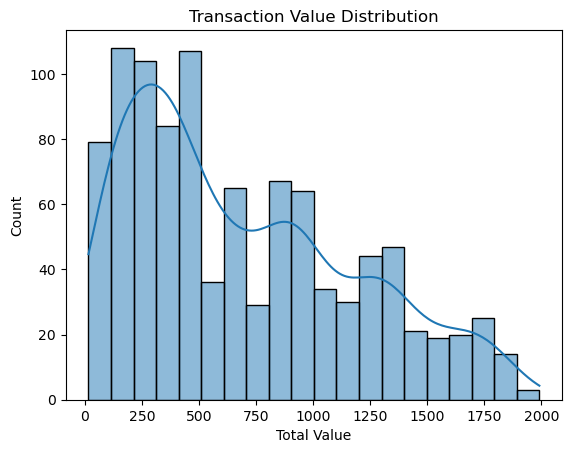

In [30]:
sns.histplot(transaction_df['TotalValue'], bins=20, kde=True)
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value')
plt.show()

In [31]:
correlation = transaction_df[['Quantity', 'Price', 'TotalValue']].corr()

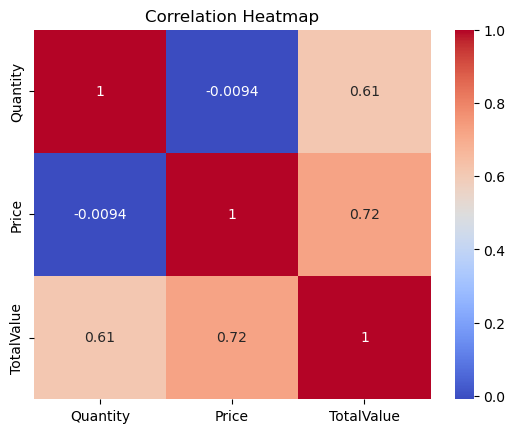

In [32]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
#Outlier detection
q1 = transaction_df['TotalValue'].quantile(0.25)
q3 = transaction_df['TotalValue'].quantile(0.75)
iqr = q3 - q1
outliers = transaction_df[(transaction_df['TotalValue'] < (q1 - 1.5 * iqr)) | (transaction_df['TotalValue'] > (q3 + 1.5 * iqr))]
print(outliers)

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []
